In [1]:
import pandas as pd
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
nys = pd.read_csv('ny_crime_hist2.csv')
nyc = pd.read_csv('nyc_crime_hist2')

In [18]:
nyc.head()

,Unnamed: 0,Year,V_crime,NV_crime,city_crime_total
0,0,1981,157080,164429,321509
1,1,1982,144111,178367,322478
2,2,1983,132766,467566,600332
3,3,1984,132462,449259,581721
4,4,1985,135336,198180,333516


In [4]:
nyc_81 = nyc[nyc.Year < 1990].city_crime_total.values
nyc_10 = nyc[(nyc.Year >= 1990)].city_crime_total.values

In [5]:
np.std(nyc_10)

160923.70827922761

In [6]:
print list(nyc_81)
print list(nyc_10)

[321509, 322478, 600332, 581721, 333516, 367029, 298819, 706887, 706211]
[667261, 455706, 558269, 701951, 694877, 287197, 287184, 562662, 555374, 295121, 226933, 309188, 218758, 568774, 565625, 624545, 317039, 542046, 376647]


In [7]:
'''
#change the mean to represent time frame
# setting up priors
mean_prior_mean = nyc.city_crime_total.mean()
mean_prior_std = nyc.city_crime_total.std()
'''

'\n#change the mean to represent time frame\n# setting up priors\nmean_prior_mean = nyc.city_crime_total.mean()\nmean_prior_std = nyc.city_crime_total.std()\n'

In [8]:
mean_prior_mean_before90 = nyc_81.mean()
mean_prior_std_before90 = nyc_81.std()

In [9]:
mean_prior_mean_after90 = nyc_10.mean()
mean_prior_std_after90 = nyc_10.std()

In [10]:
#Priors on means
with pm.Model() as model:
    before90_mean = pm.Normal('before90_mean', mean_prior_mean_before90, sd=mean_prior_std_before90)
    after90_mean = pm.Normal('after90_mean', mean_prior_mean_after90, sd=mean_prior_std_after90)

In [11]:
#change std prior

In [12]:
#Priors on std
std_prior_lower = 0.01
std_prior_upper_before90 = (np.std(nyc_81)) * 2
std_prior_upper_after90 = (np.std(nyc_10)) * 2
with model:
    before90_std = pm.Uniform('before90_std', lower=std_prior_lower, upper=std_prior_upper_before90)
    after90_std = pm.Uniform('after90_std', lower=std_prior_lower, upper=std_prior_upper_after90)

In [13]:
with model:
    before90 = pm.Normal('Before90', mu=before90_mean, sd=before90_std, observed=nyc_81)
    after90 = pm.Normal('After90', mu=after90_mean, sd=after90_std, observed=nyc_10)

In [14]:
import numpy as np
with model:

    diff_of_means = pm.Deterministic('difference of means', before90_mean - after90_mean)
    diff_of_stds = pm.Deterministic('difference of stds', before90_std - after90_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((before90_std**2 + after90_std**2) / 2))

In [15]:
with model:
    trace = pm.sample(25000, njobs=-1)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -381.18: 100%|██████████| 200000/200000 [00:27<00:00, 7401.84it/s]
Finished [100%]: Average ELBO = -381.26
100%|██████████| 25000/25000 [00:48<00:00, 517.06it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x117a03310>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x117d98c90>], dtype=object)

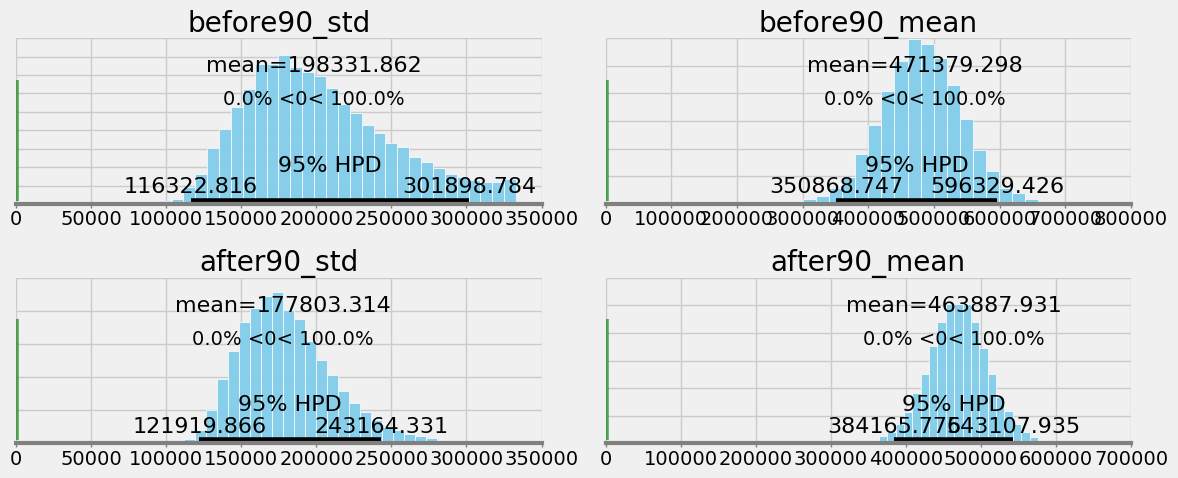

In [16]:
plt.rcParams['figure.figsize'] = (24, 18)
pm.plot_posterior(trace[25000:],
                 varnames=['before90_mean', 'after90_mean', 'before90_std', 'after90_std'],
                  ref_val=0, color='#87ceeb')

ValueError: Too few elements for interval calculation

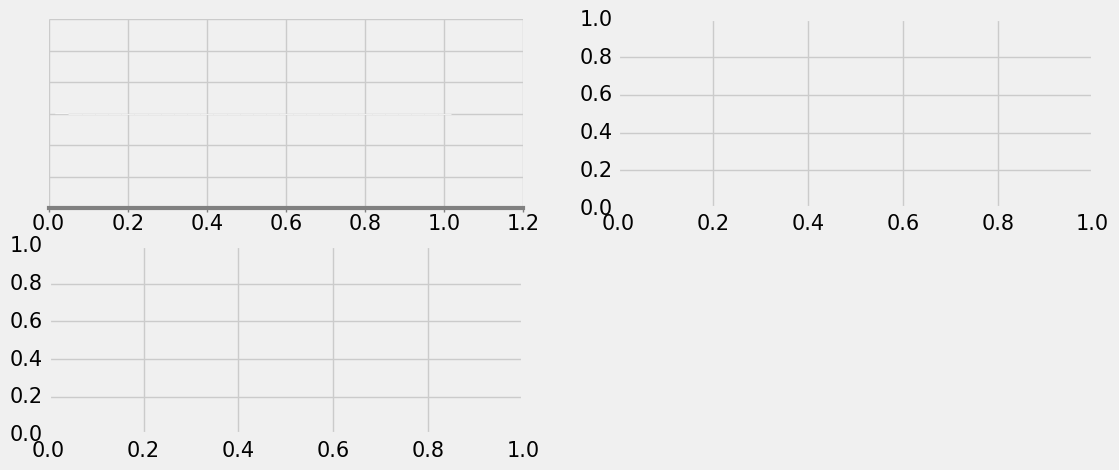

In [21]:
pm.plot_posterior(trace[25000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')